In [1]:
import pandas as pd
from collections import Counter
import numpy as np


In [2]:
ms = pd.read_excel('MegaSena.xlsx')
ms.head()

,Concurso,Data,N1,N2,N3,N4,N5,N6,Ganhadores,Premio,HouveGanhador
0,2324,05/12/2020,2,16,19,31,43,60,0,NaN,0
1,2323,02/12/2020,20,27,35,39,50,59,0,NaN,0
2,2322,28/11/2020,2,5,10,29,34,41,0,NaN,0
3,2321,25/11/2020,14,25,28,41,43,46,1,3036906.71,1
4,2320,21/11/2020,6,30,35,39,42,48,1,76128023.58,1


#### Verificando o percentual de ganhadores

In [3]:
df_ganhadores = ms['Ganhadores']

In [4]:
wins = df_ganhadores[(df_ganhadores != 0)]; loss = df_ganhadores[(df_ganhadores == 0)]

In [5]:
wins_freq = (wins.count()/df_ganhadores.count())*100; 
print("No total, %.3f%% dos sorteios houve 1 ganhador ou mais." % wins_freq)
print("Resultando em um percentual de %.3f%% de sorteios sem vencedores." % (100-wins_freq))

No total, 22.892% dos sorteios houve 1 ganhador ou mais.
Resultando em um percentual de 77.108% de sorteios sem vencedores.


In [6]:
df_ganhadores.mean()

0.3489672977624785

## Unindo todos os valores jogados em uma única coluna

In [7]:
all_values = pd.concat([ms.N1, ms.N2, ms.N3, ms.N4, ms.N5, ms.N6])

## Agrupando os valores e verificando a frequência geral dos valores

In [8]:
all_values

0        2
1       20
2        2
3       14
4        6
        ..
2319    46
2320    59
2321    47
2322    49
2323    52
Length: 13944, dtype: int64

In [9]:
count = Counter(all_values.sort_values(ascending=True))

In [10]:
type(count)

collections.Counter

In [11]:
df = pd.DataFrame.from_dict(count, orient='index') #convertendo o objeto collections.Count em pd.DataFrame

In [12]:
df

,0
1,231
2,238
3,212
4,251
5,257
6,240
7,221
8,231
9,214
10,265


In [13]:
df.columns = ['freq'] #renomeado a coluna da frequência

In [14]:
total = df['freq'].sum() #total de valores (daria no mesmo fazer (ms['Concurso'].count())/6 )
jogos = ms['Concurso'].count() #número total de jogos

In [15]:
total

13944

In [16]:
jogos

2324

#### Selecionando valores leatórios dentro dos 50 números mais sorteados

In [24]:
mydf = df.freq.sort_values(ascending=False).head(60).to_frame()
mydf.head()

,freq
10,265
53,264
5,257
33,255
23,254


In [18]:
#mydf.iloc[np.random.choice(np.arange(len(mydf)), 6, False)] #úmeros randomicos
mydf.loc[np.random.permutation(mydf.index)[:6]] #permutação

,freq
15,206
39,219
17,242
37,248
9,214
21,203


## Exibindo a frequência dos valores

In [19]:
import matplotlib.pyplot as plt

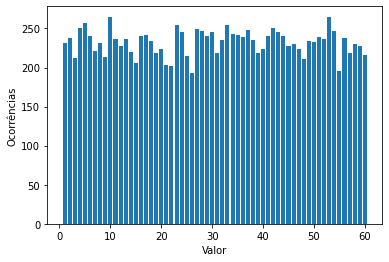

In [20]:
plt.bar(count.keys(), count.values())
plt.xlabel('Valor')
plt.ylabel('Ocorrências')
plt.show()

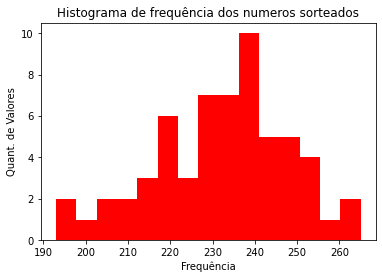

In [21]:
plt.hist(df["freq"], color='red', bins=15)
plt.title('Histograma de frequência dos numeros sorteados')
plt.xlabel('Frequência')
plt.ylabel('Quant. de Valores')

# Show graphic
plt.show()



In [22]:
df.describe()

,freq
count,60.000000
mean,232.400000
std,15.970524
min,193.000000
25%,220.750000
50%,235.000000
75%,242.250000
max,265.000000


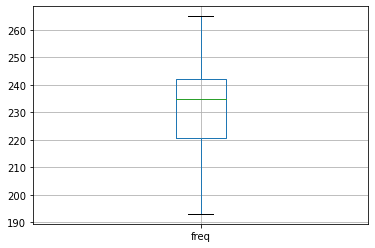

In [23]:
df.boxplot()

## Rede Neural